In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error

# Load the dataset
dataset = pd.read_csv("/content/heart_failure_dataset.csv")

# Extract features and target variable
X = dataset.iloc[:, :-1]  # Features (all columns except the last one)
y = dataset.iloc[:, -1]   # Target variable (last column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

# Standardize features for linear regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Naive Bayes Classifier
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Linear Regression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train)

# Predictions
naive_bayes_predictions = naive_bayes_model.predict(X_test)
linear_regression_predictions = linear_regression_model.predict(X_test_scaled)

# Evaluation
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
linear_regression_mae = mean_absolute_error(y_test, linear_regression_predictions)

print(f"Naive Bayes Accuracy: {naive_bayes_accuracy:.2f}")
print(f"Linear Regression Mean Absolute Error: {linear_regression_mae:.2f}")

# Since linear regression is a regression task, you don't need classification_report for it.
# If you still want a report for Naive Bayes, you can use classification_report for it.
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, naive_bayes_predictions))


Naive Bayes Accuracy: 0.92
Linear Regression Mean Absolute Error: 0.28

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.90      0.69      0.78        13

    accuracy                           0.92        60
   macro avg       0.91      0.84      0.87        60
weighted avg       0.92      0.92      0.91        60



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load your dataset
dataset_path = '/content/heart_failure_dataset.csv'
df = pd.read_csv(dataset_path)

# Assuming 'DEATH_EVENT' is the column representing the death event
X = df.iloc[:, :-1]  # Features
y = df['DEATH_EVENT']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

# Naive Bayes Classifier
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
nb_predictions = naive_bayes_model.predict(X_test)

# Linear Regression
linear_regression_model = LogisticRegression()
linear_regression_model.fit(X_train, y_train)
lr_predictions = linear_regression_model.predict(X_test)

# Evaluate models
print("Naive Bayes Classifier:")
print(f"Accuracy: {accuracy_score(y_test, nb_predictions):.2f}")
print("Classification Report:\n", classification_report(y_test, nb_predictions))

print("\nLinear Regression:")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions):.2f}")
print("Classification Report:\n", classification_report(y_test, lr_predictions))


Naive Bayes Classifier:
Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.90      0.69      0.78        13

    accuracy                           0.92        60
   macro avg       0.91      0.84      0.87        60
weighted avg       0.92      0.92      0.91        60


Linear Regression:
Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91        47
           1       0.67      0.62      0.64        13

    accuracy                           0.85        60
   macro avg       0.78      0.77      0.77        60
weighted avg       0.85      0.85      0.85        60



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error

In [ ]:
dataset = pd.read_csv('/content/heart_failure_dataset.csv')
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
dataset.shape

(299, 13)

In [ ]:
dataset.isnull().sum()


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
dataset[dataset.duplicated()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [ ]:
X = dataset.drop(columns=['DEATH_EVENT'])
y = dataset['DEATH_EVENT']

In [ ]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [ ]:
continuous_features = [i for i in X.columns if X[i].nunique() > 10]
print(f'continuous feature: {continuous_features}')

continuous feature: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


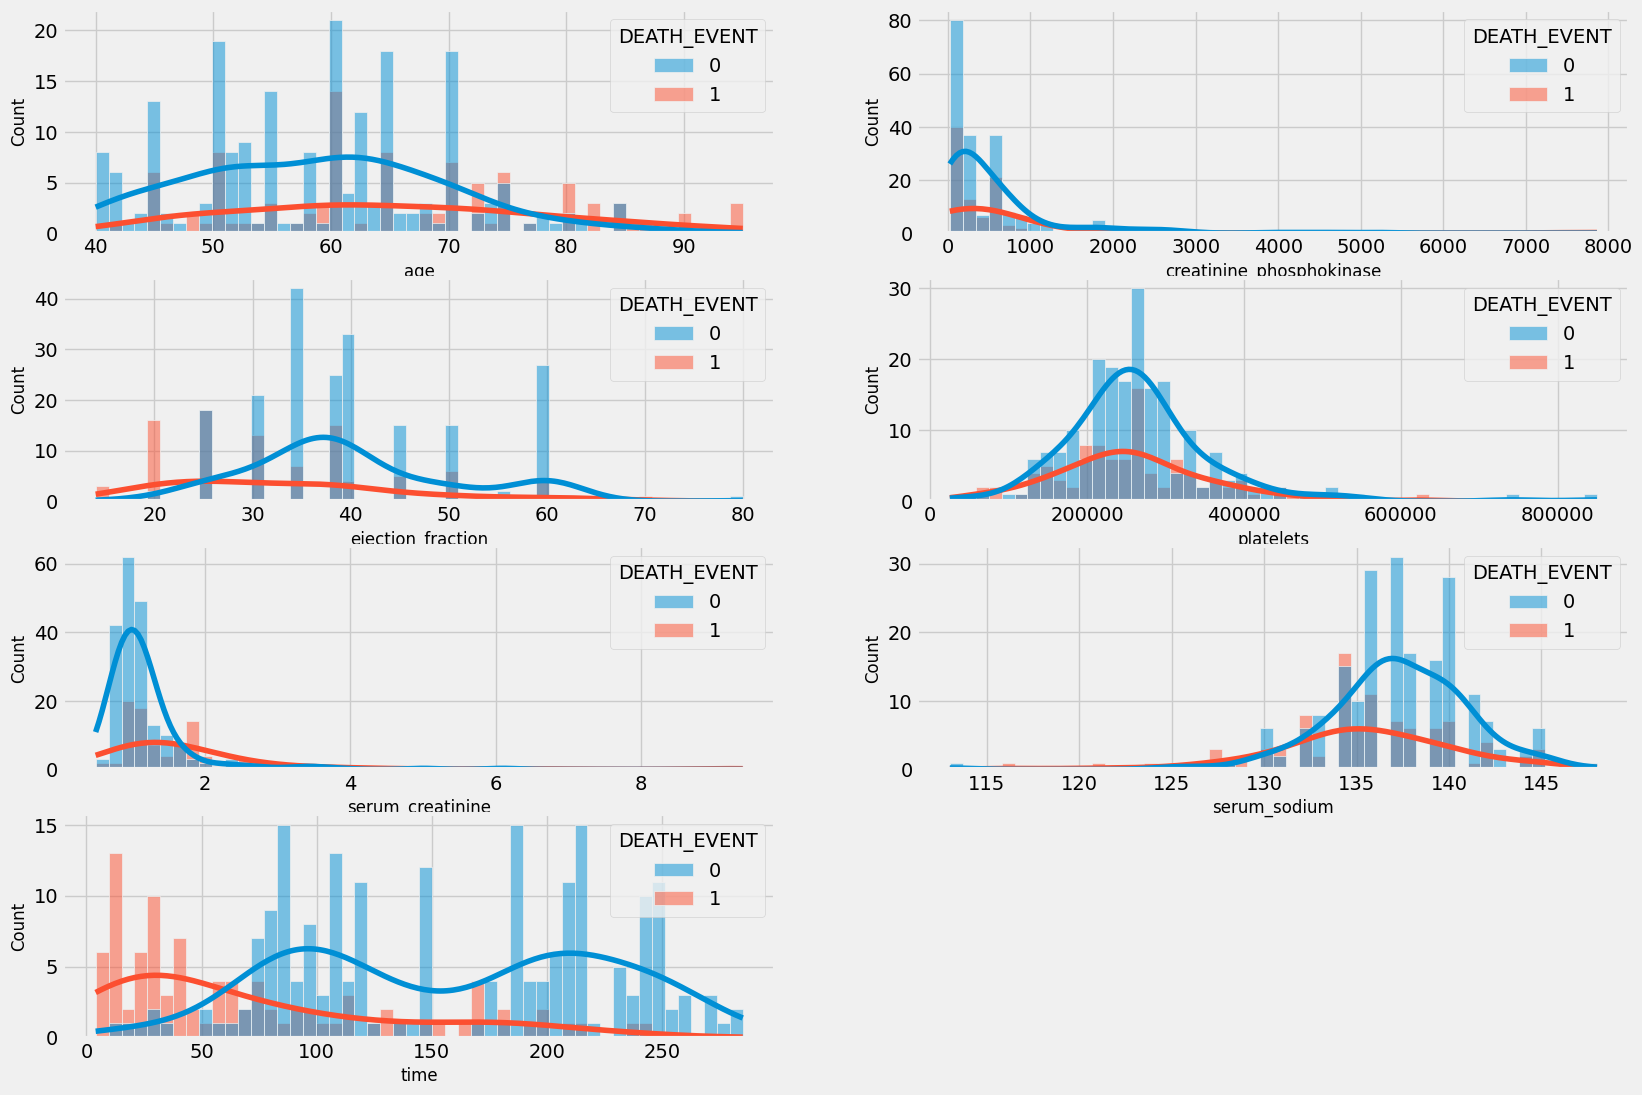

In [ ]:
plt.style.use('fivethirtyeight')
i = 1
plt.figure(figsize=(18,16))
for feature in continuous_features:
    plt.subplot(round(len(continuous_features)/2)+1, 2, i)
    sns.histplot(x=X[feature], kde=True, bins=50, hue=y)
    plt.xlabel(feature,size=12)
    plt.ylabel("Count",size=12)
    i += 1

plt.show()

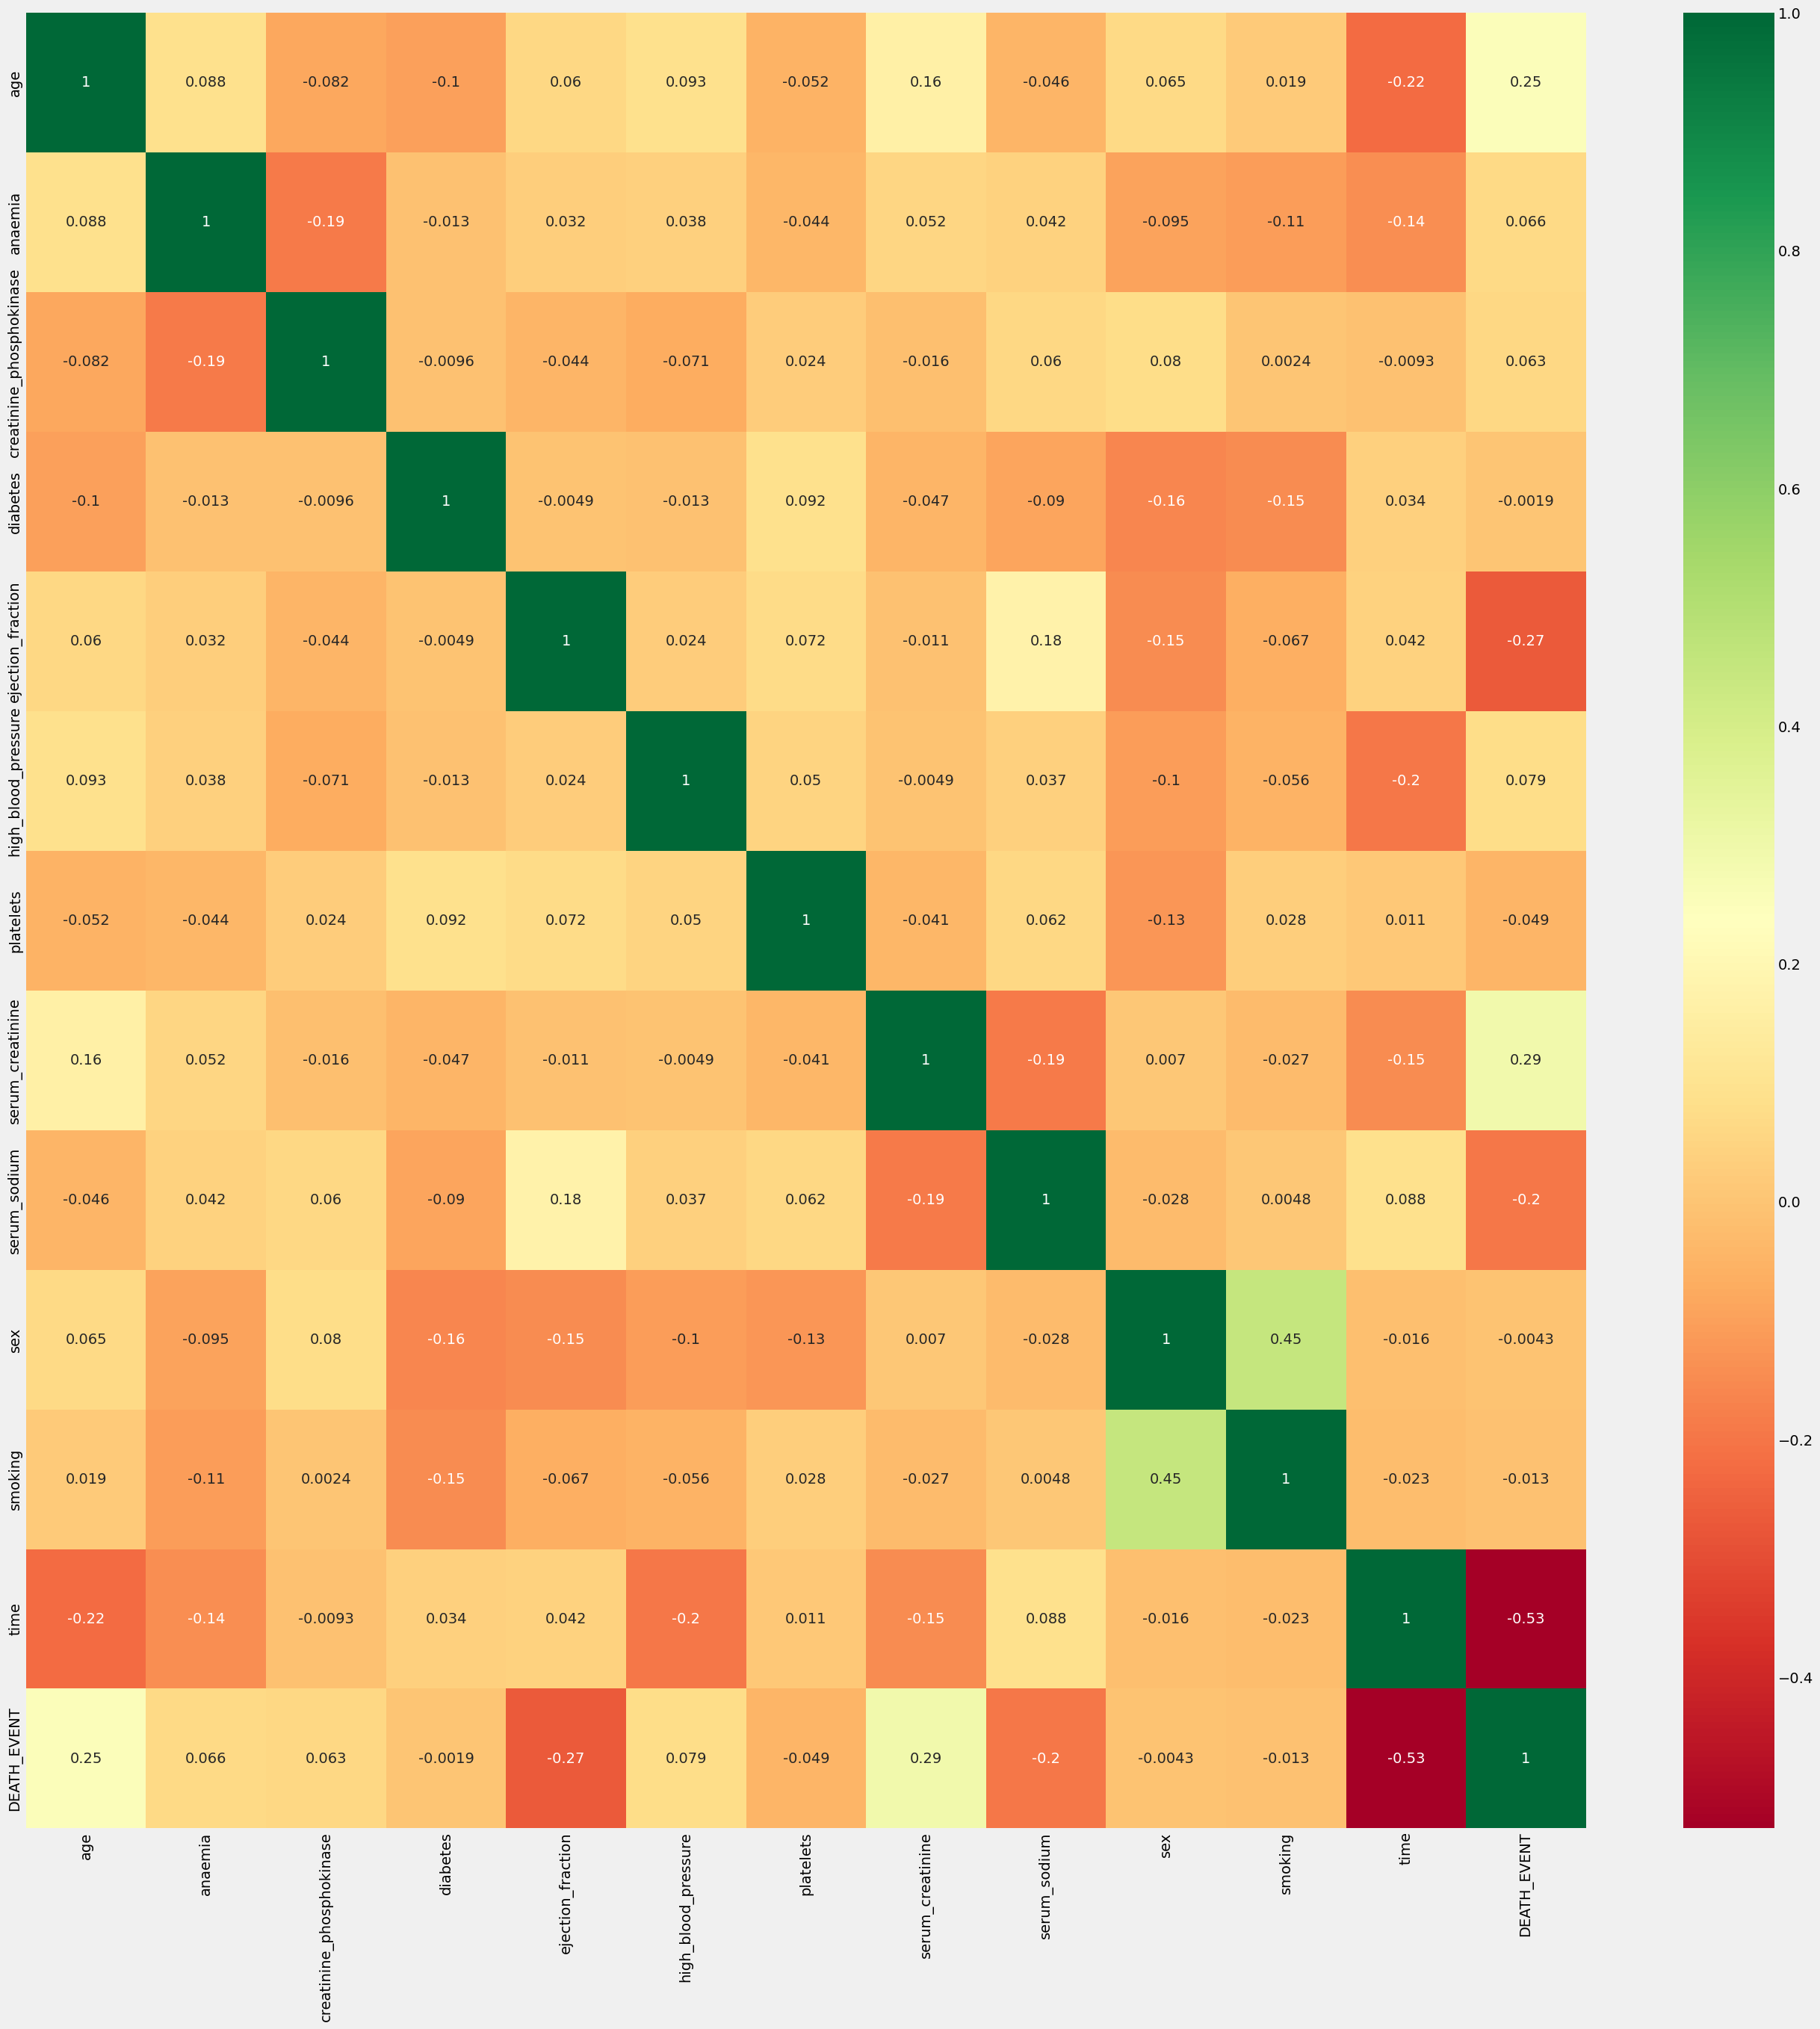

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

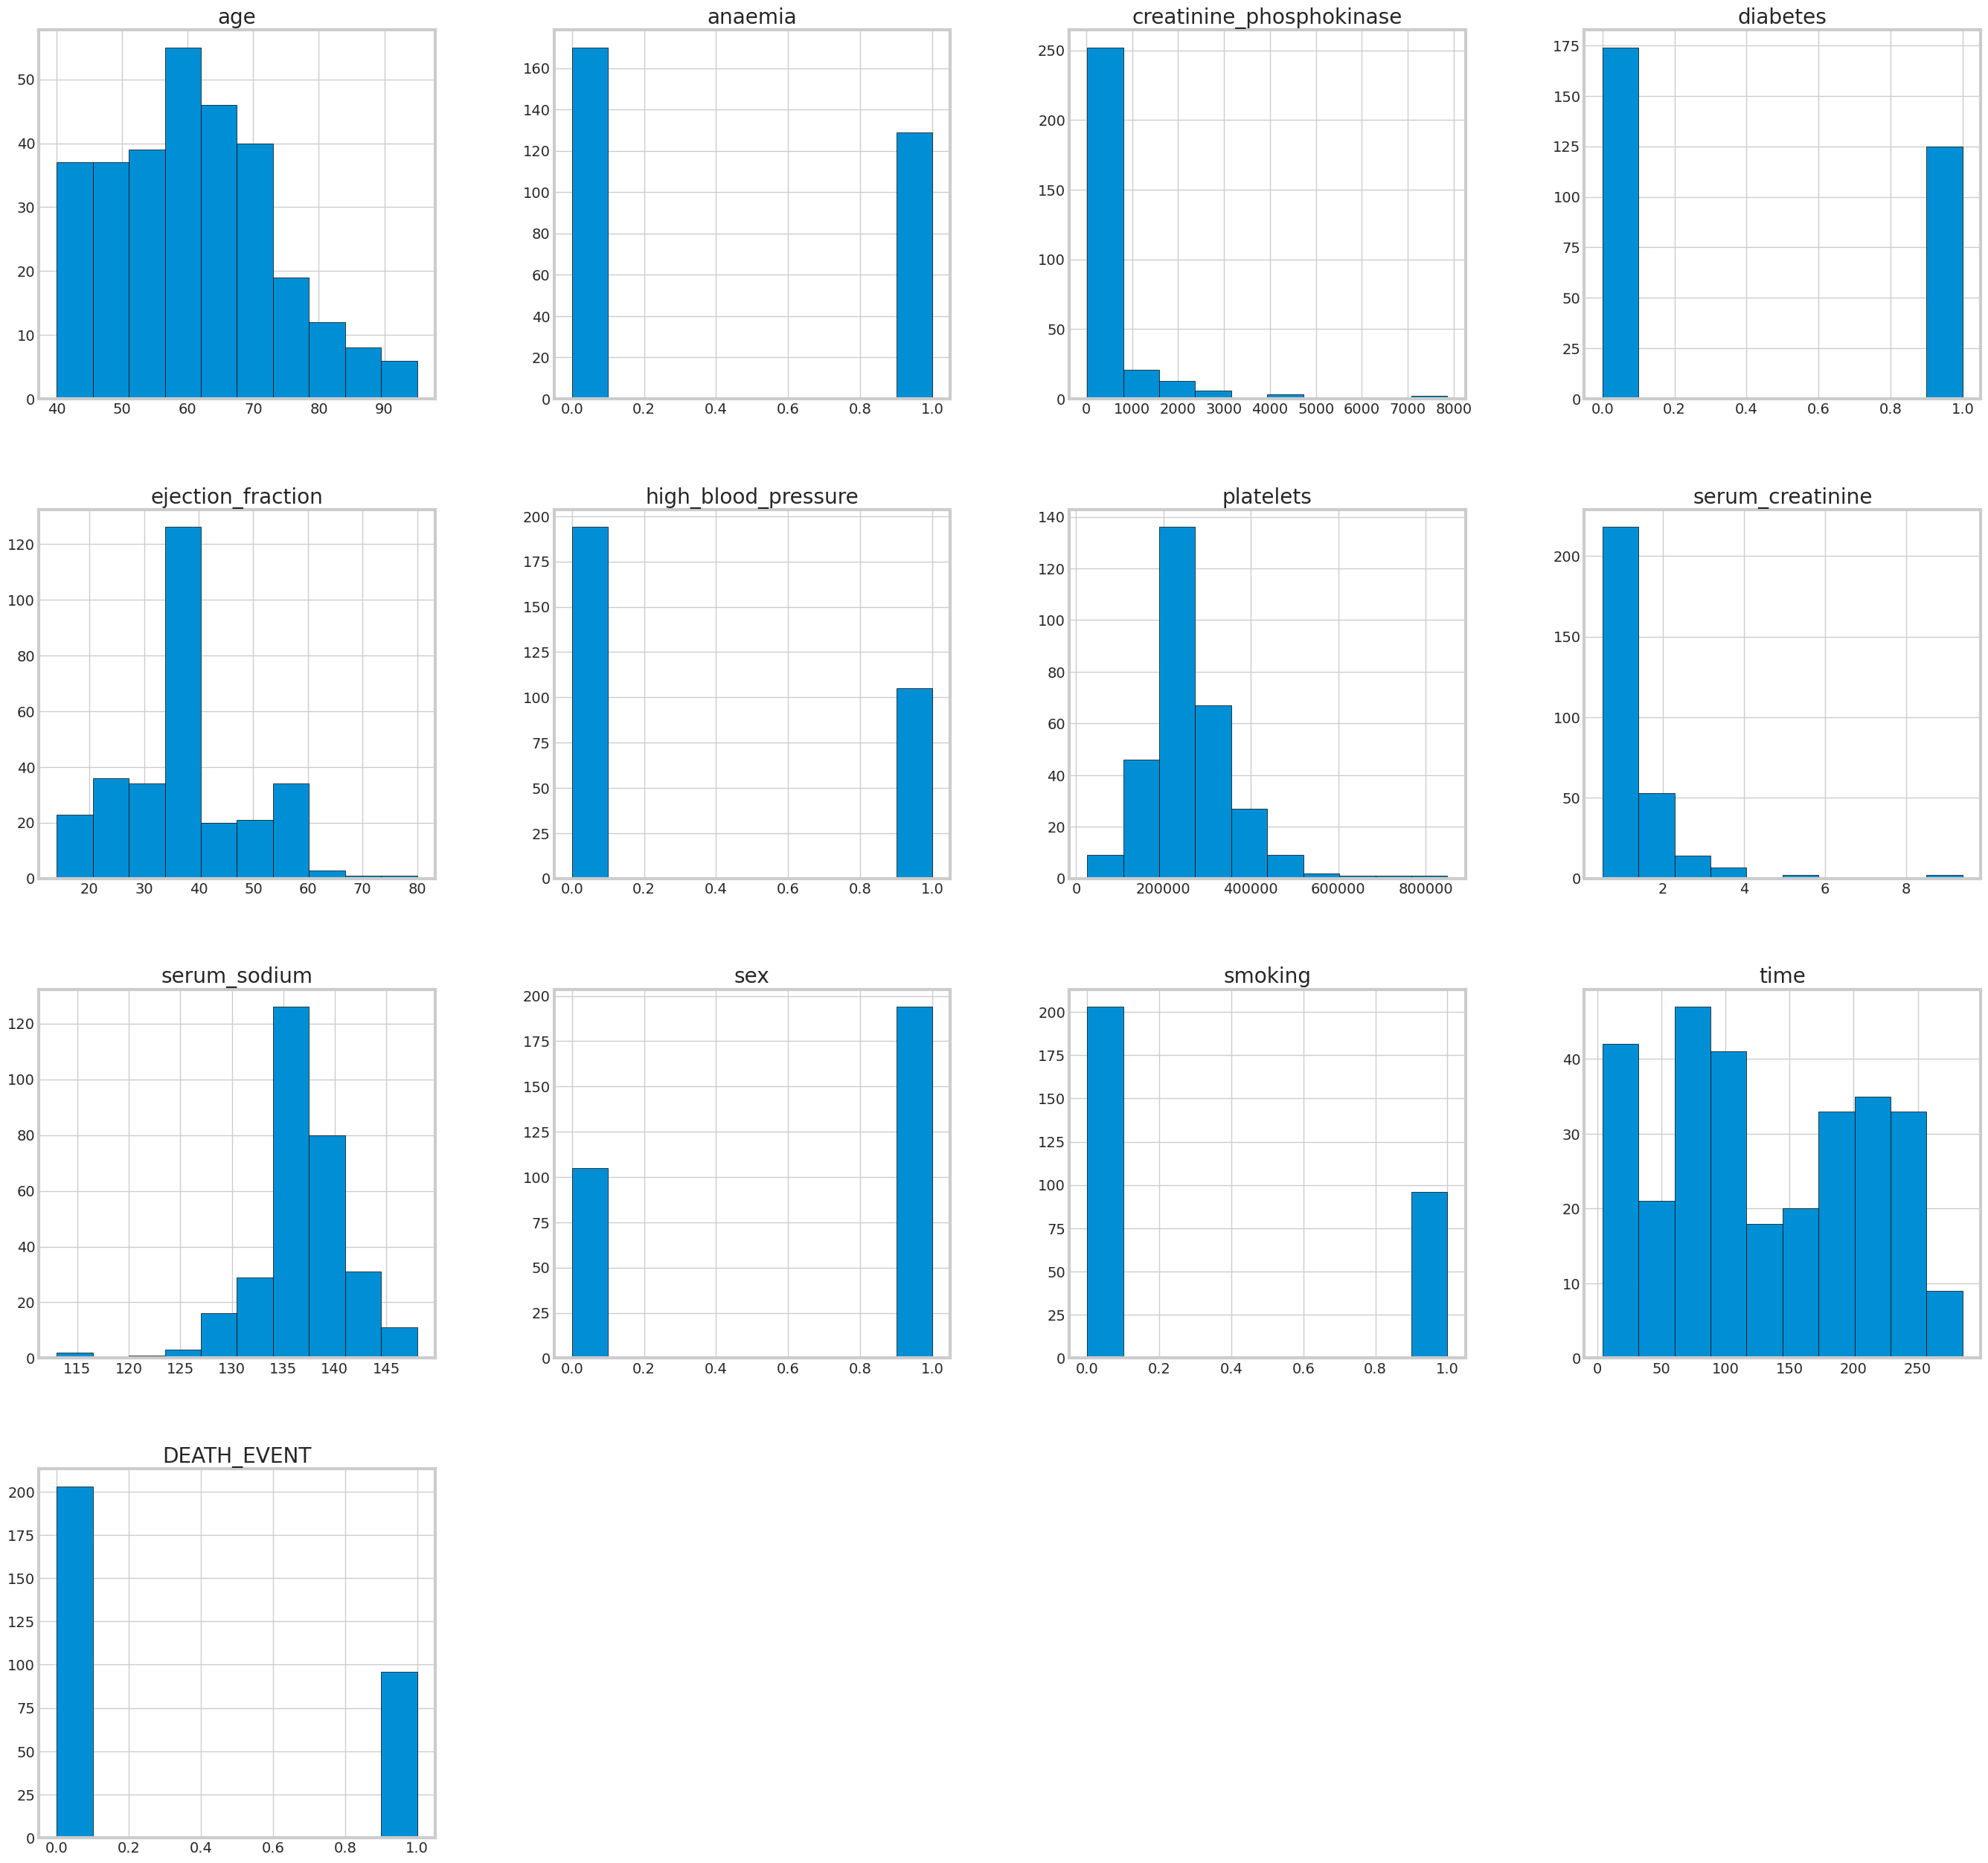

In [ ]:
dataset.hist(edgecolor='black',figsize=(30,30));


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

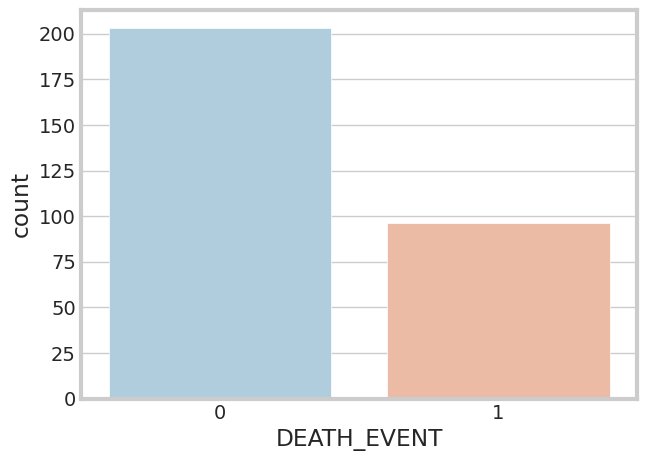

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='DEATH_EVENT',data=dataset,palette='RdBu_r')

In [ ]:
y = dataset['DEATH_EVENT']
X = dataset.drop(['DEATH_EVENT'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

# Standardize features for linear regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Naive Bayes Classifier
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Linear Regression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train)

# Predictions
naive_bayes_predictions = naive_bayes_model.predict(X_test)
linear_regression_predictions = linear_regression_model.predict(X_test_scaled)

# Evaluation
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
linear_regression_mae = mean_absolute_error(y_test, linear_regression_predictions)

# Print Results

print(f"Naive Bayes Accuracy: {naive_bayes_accuracy:.2f}")
print(f"Linear Regression Mean Absolute Error: {linear_regression_mae:.2f}")

# Classification Report for Naive Bayes
naive_bayes_report = classification_report(y_test, naive_bayes_predictions)
print("\nNaive Bayes Classification Report:")
print(naive_bayes_report)








Naive Bayes Accuracy: 0.92
Linear Regression Mean Absolute Error: 0.28

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.90      0.69      0.78        13

    accuracy                           0.92        60
   macro avg       0.91      0.84      0.87        60
weighted avg       0.92      0.92      0.91        60



In [ ]:

from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error

def print_evaluation(model_name, y_test, predictions, is_classification=True):
    if is_classification:
        accuracy = accuracy_score(y_test, predictions)
        report = classification_report(y_test, predictions)
        print(f"{model_name} Classification Evaluation:")
        print(f"Accuracy: {accuracy:.2f}")
        print("Classification Report:\n", report)
    else:
        mae = mean_absolute_error(y_test, predictions)
        print(f"{model_name} Regression Evaluation:")
        print(f"Mean Absolute Error: {mae:.2f}")

# Assuming you have nb_predictions and lr_predictions defined
nb_predictions = naive_bayes_model.predict(X_test)
lr_predictions = linear_regression_model.predict(X_test_scaled)

# Print evaluations
print_evaluation("Naive Bayes Classifier", y_test, nb_predictions)
print_evaluation("Linear Regression", y_test, lr_predictions, is_classification=False)




Naive Bayes Classifier Classification Evaluation:
Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.90      0.69      0.78        13

    accuracy                           0.92        60
   macro avg       0.91      0.84      0.87        60
weighted avg       0.92      0.92      0.91        60

Linear Regression Regression Evaluation:
Mean Absolute Error: 0.28


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

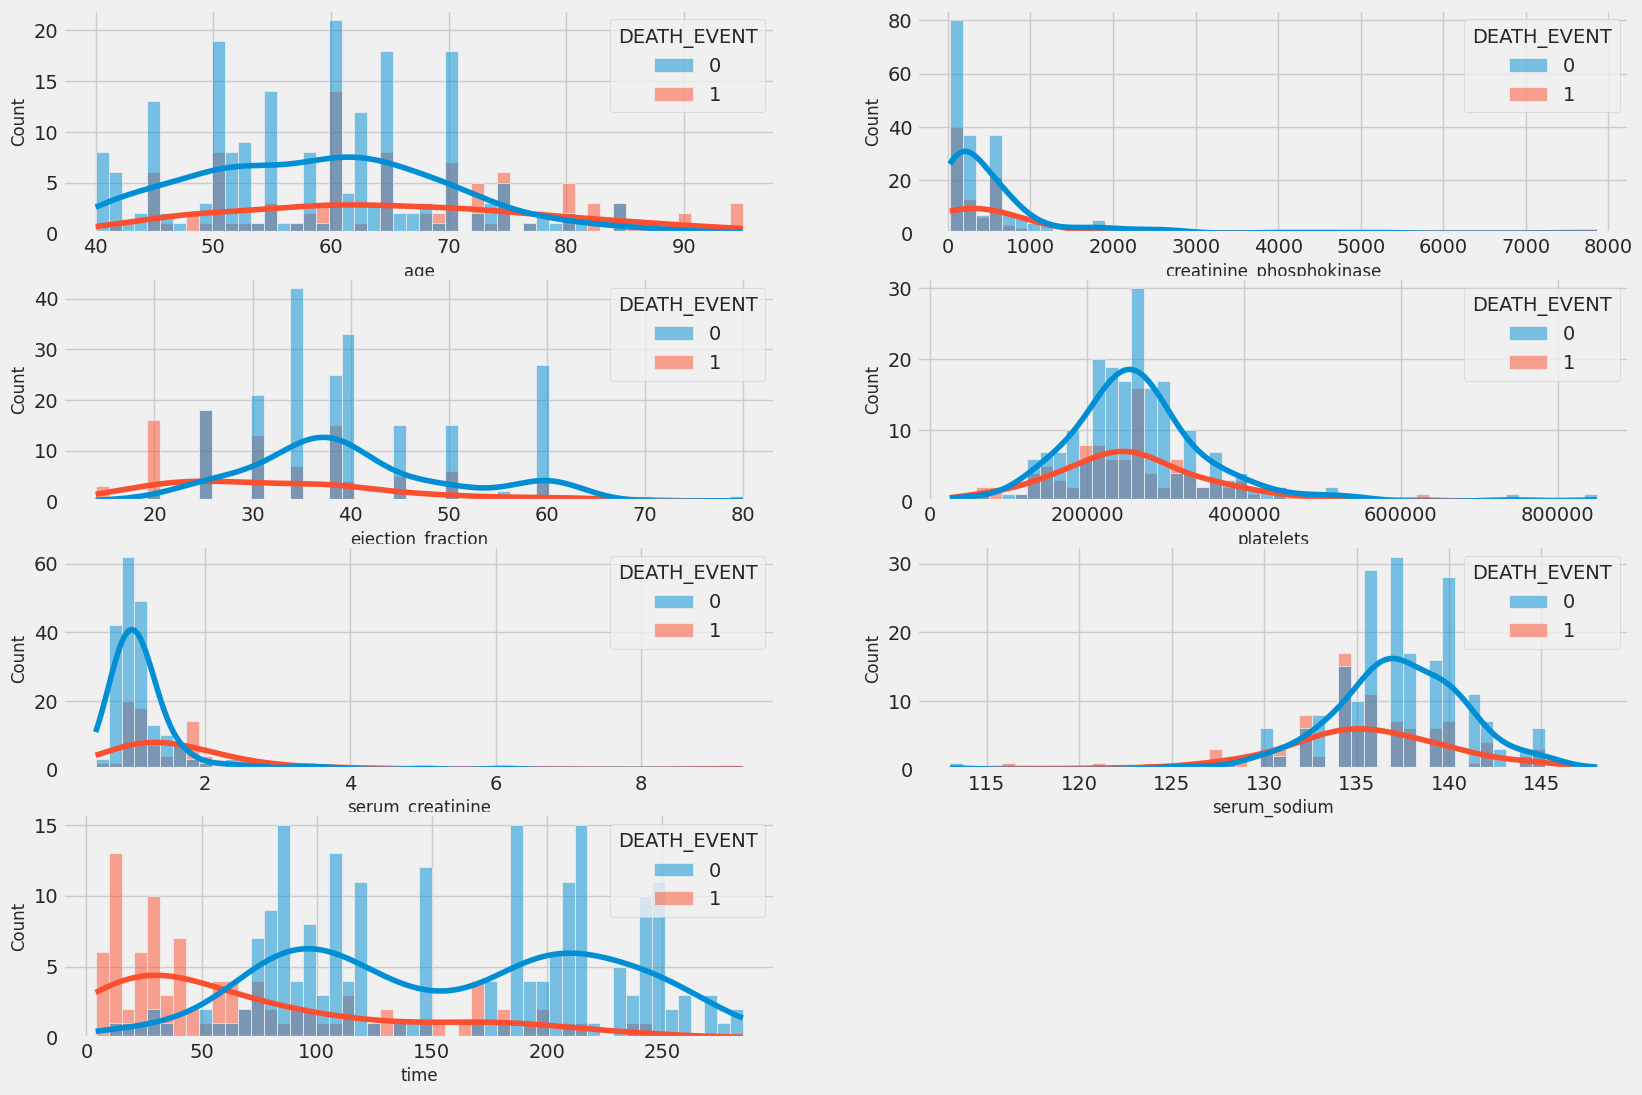

Naive Bayes Accuracy: 0.92
Linear Regression Mean Absolute Error: 0.28

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.90      0.69      0.78        13

    accuracy                           0.92        60
   macro avg       0.91      0.84      0.87        60
weighted avg       0.92      0.92      0.91        60



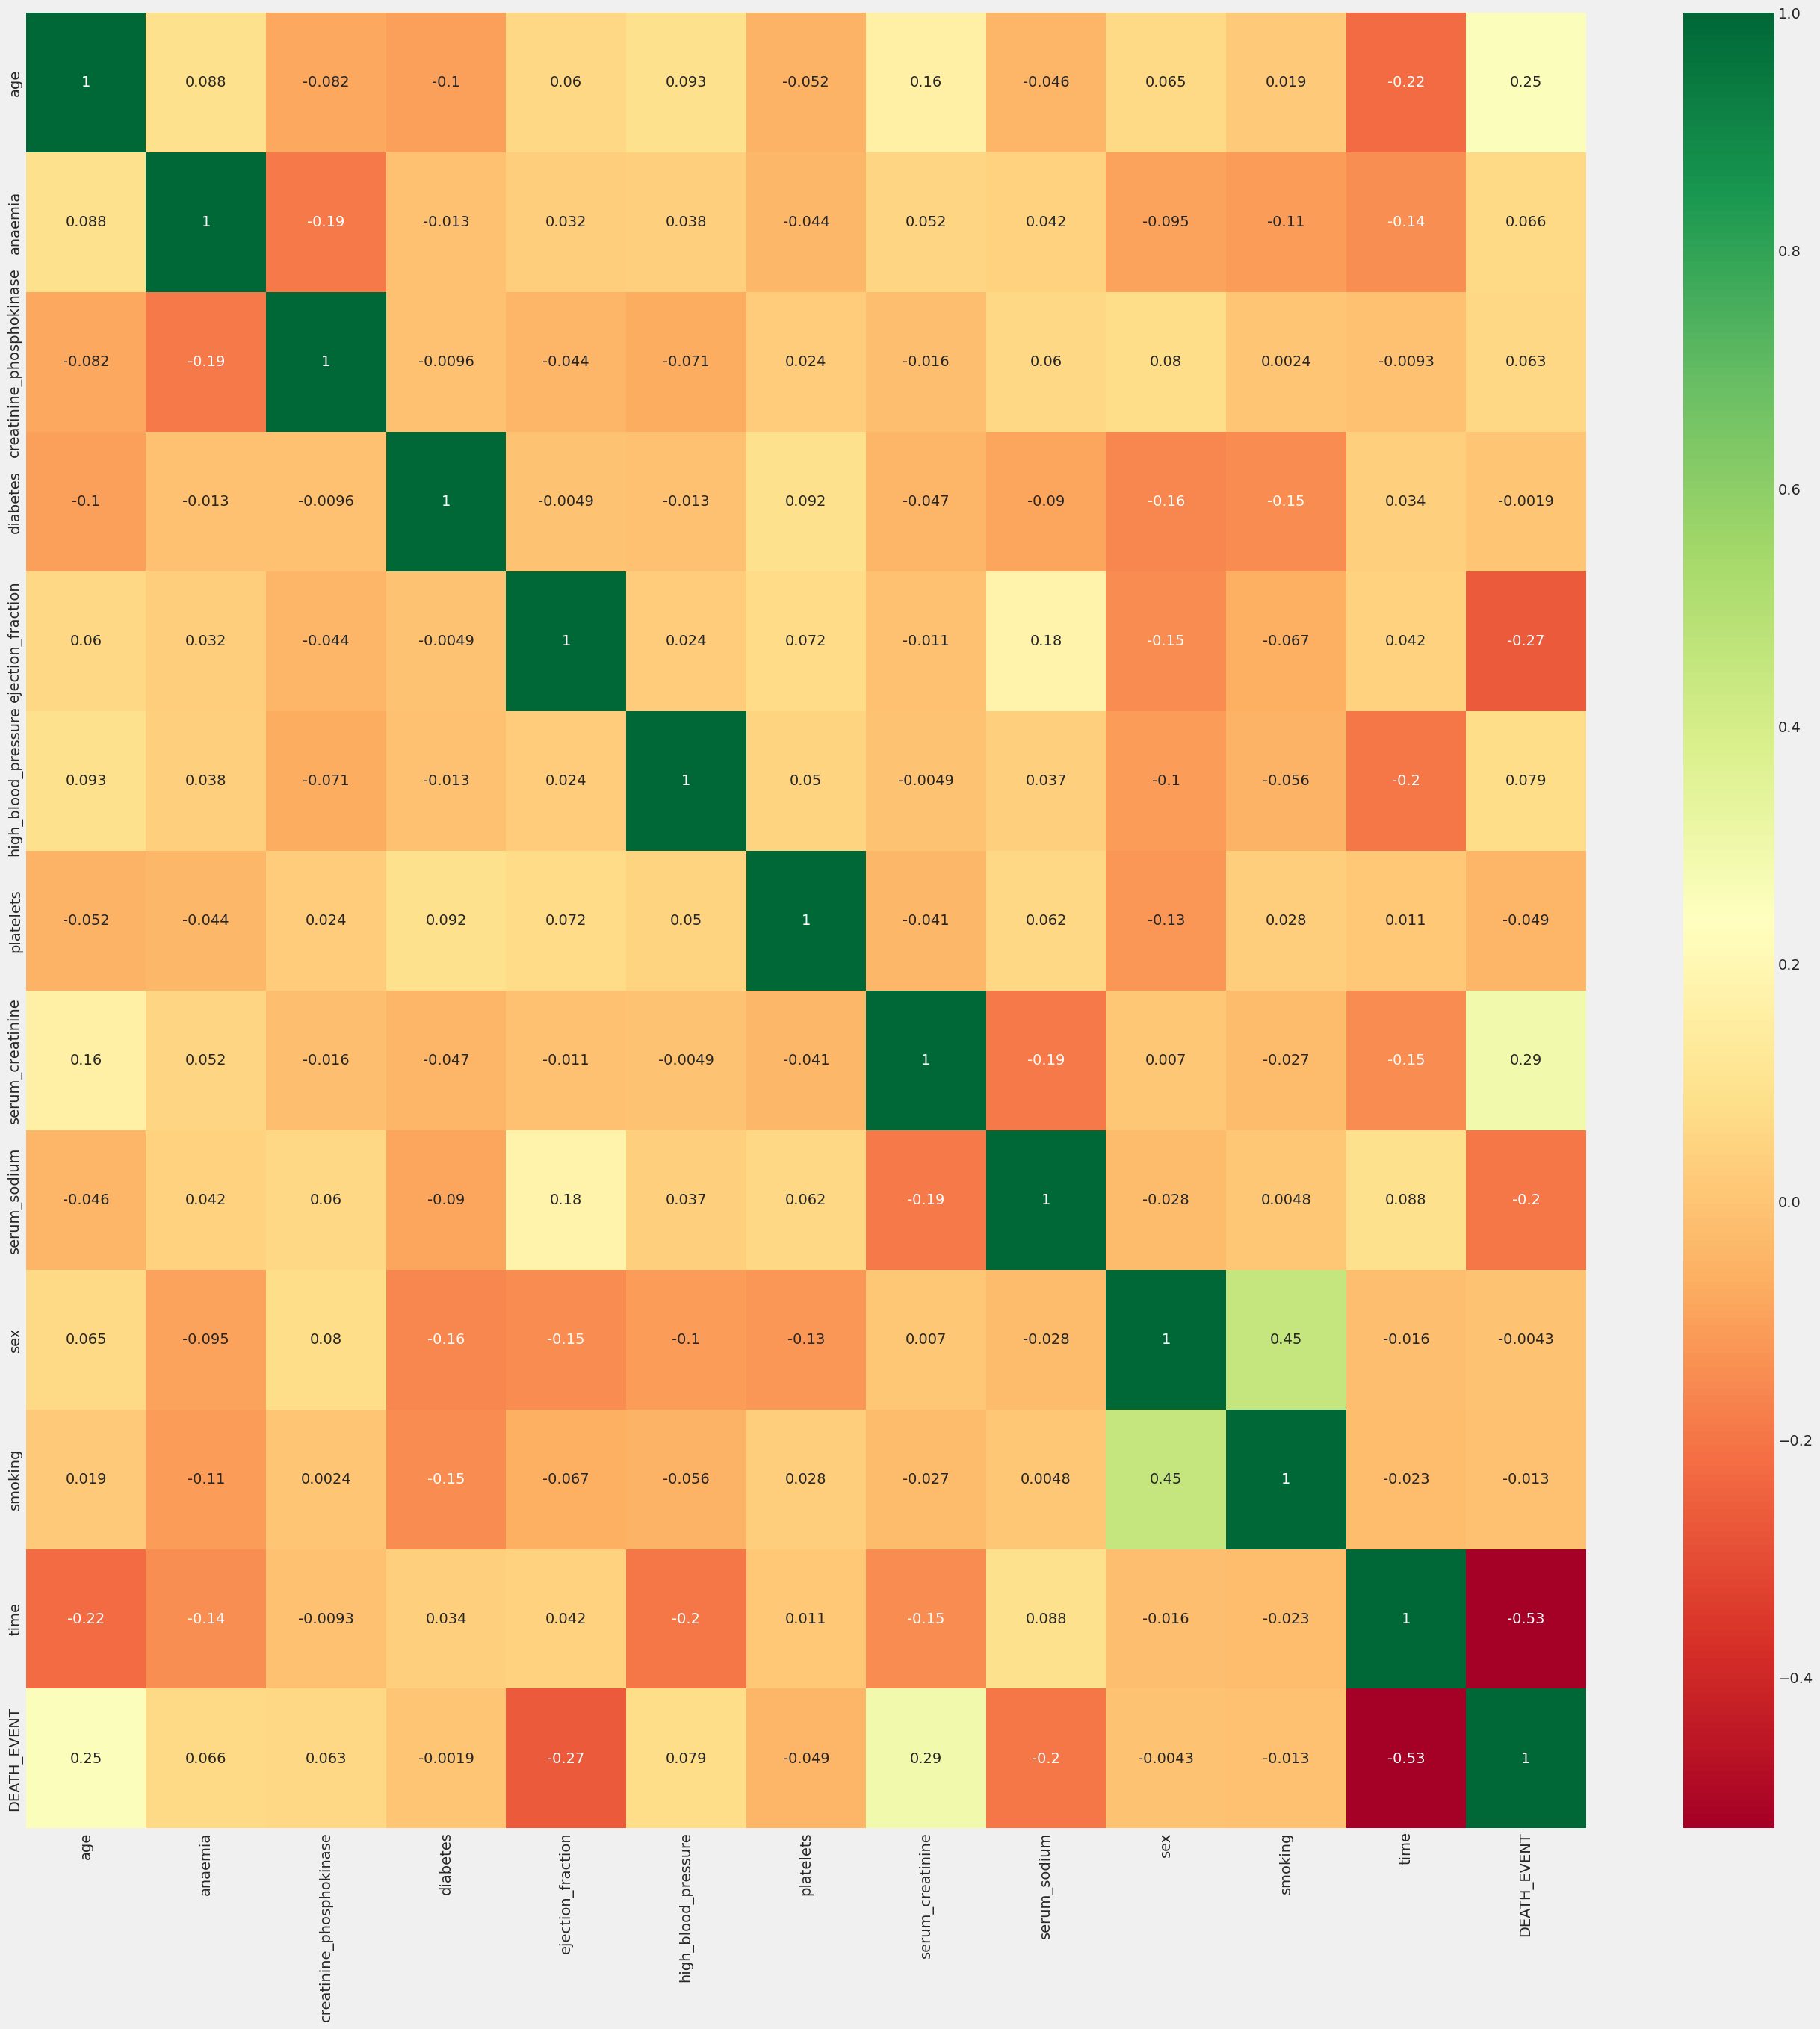

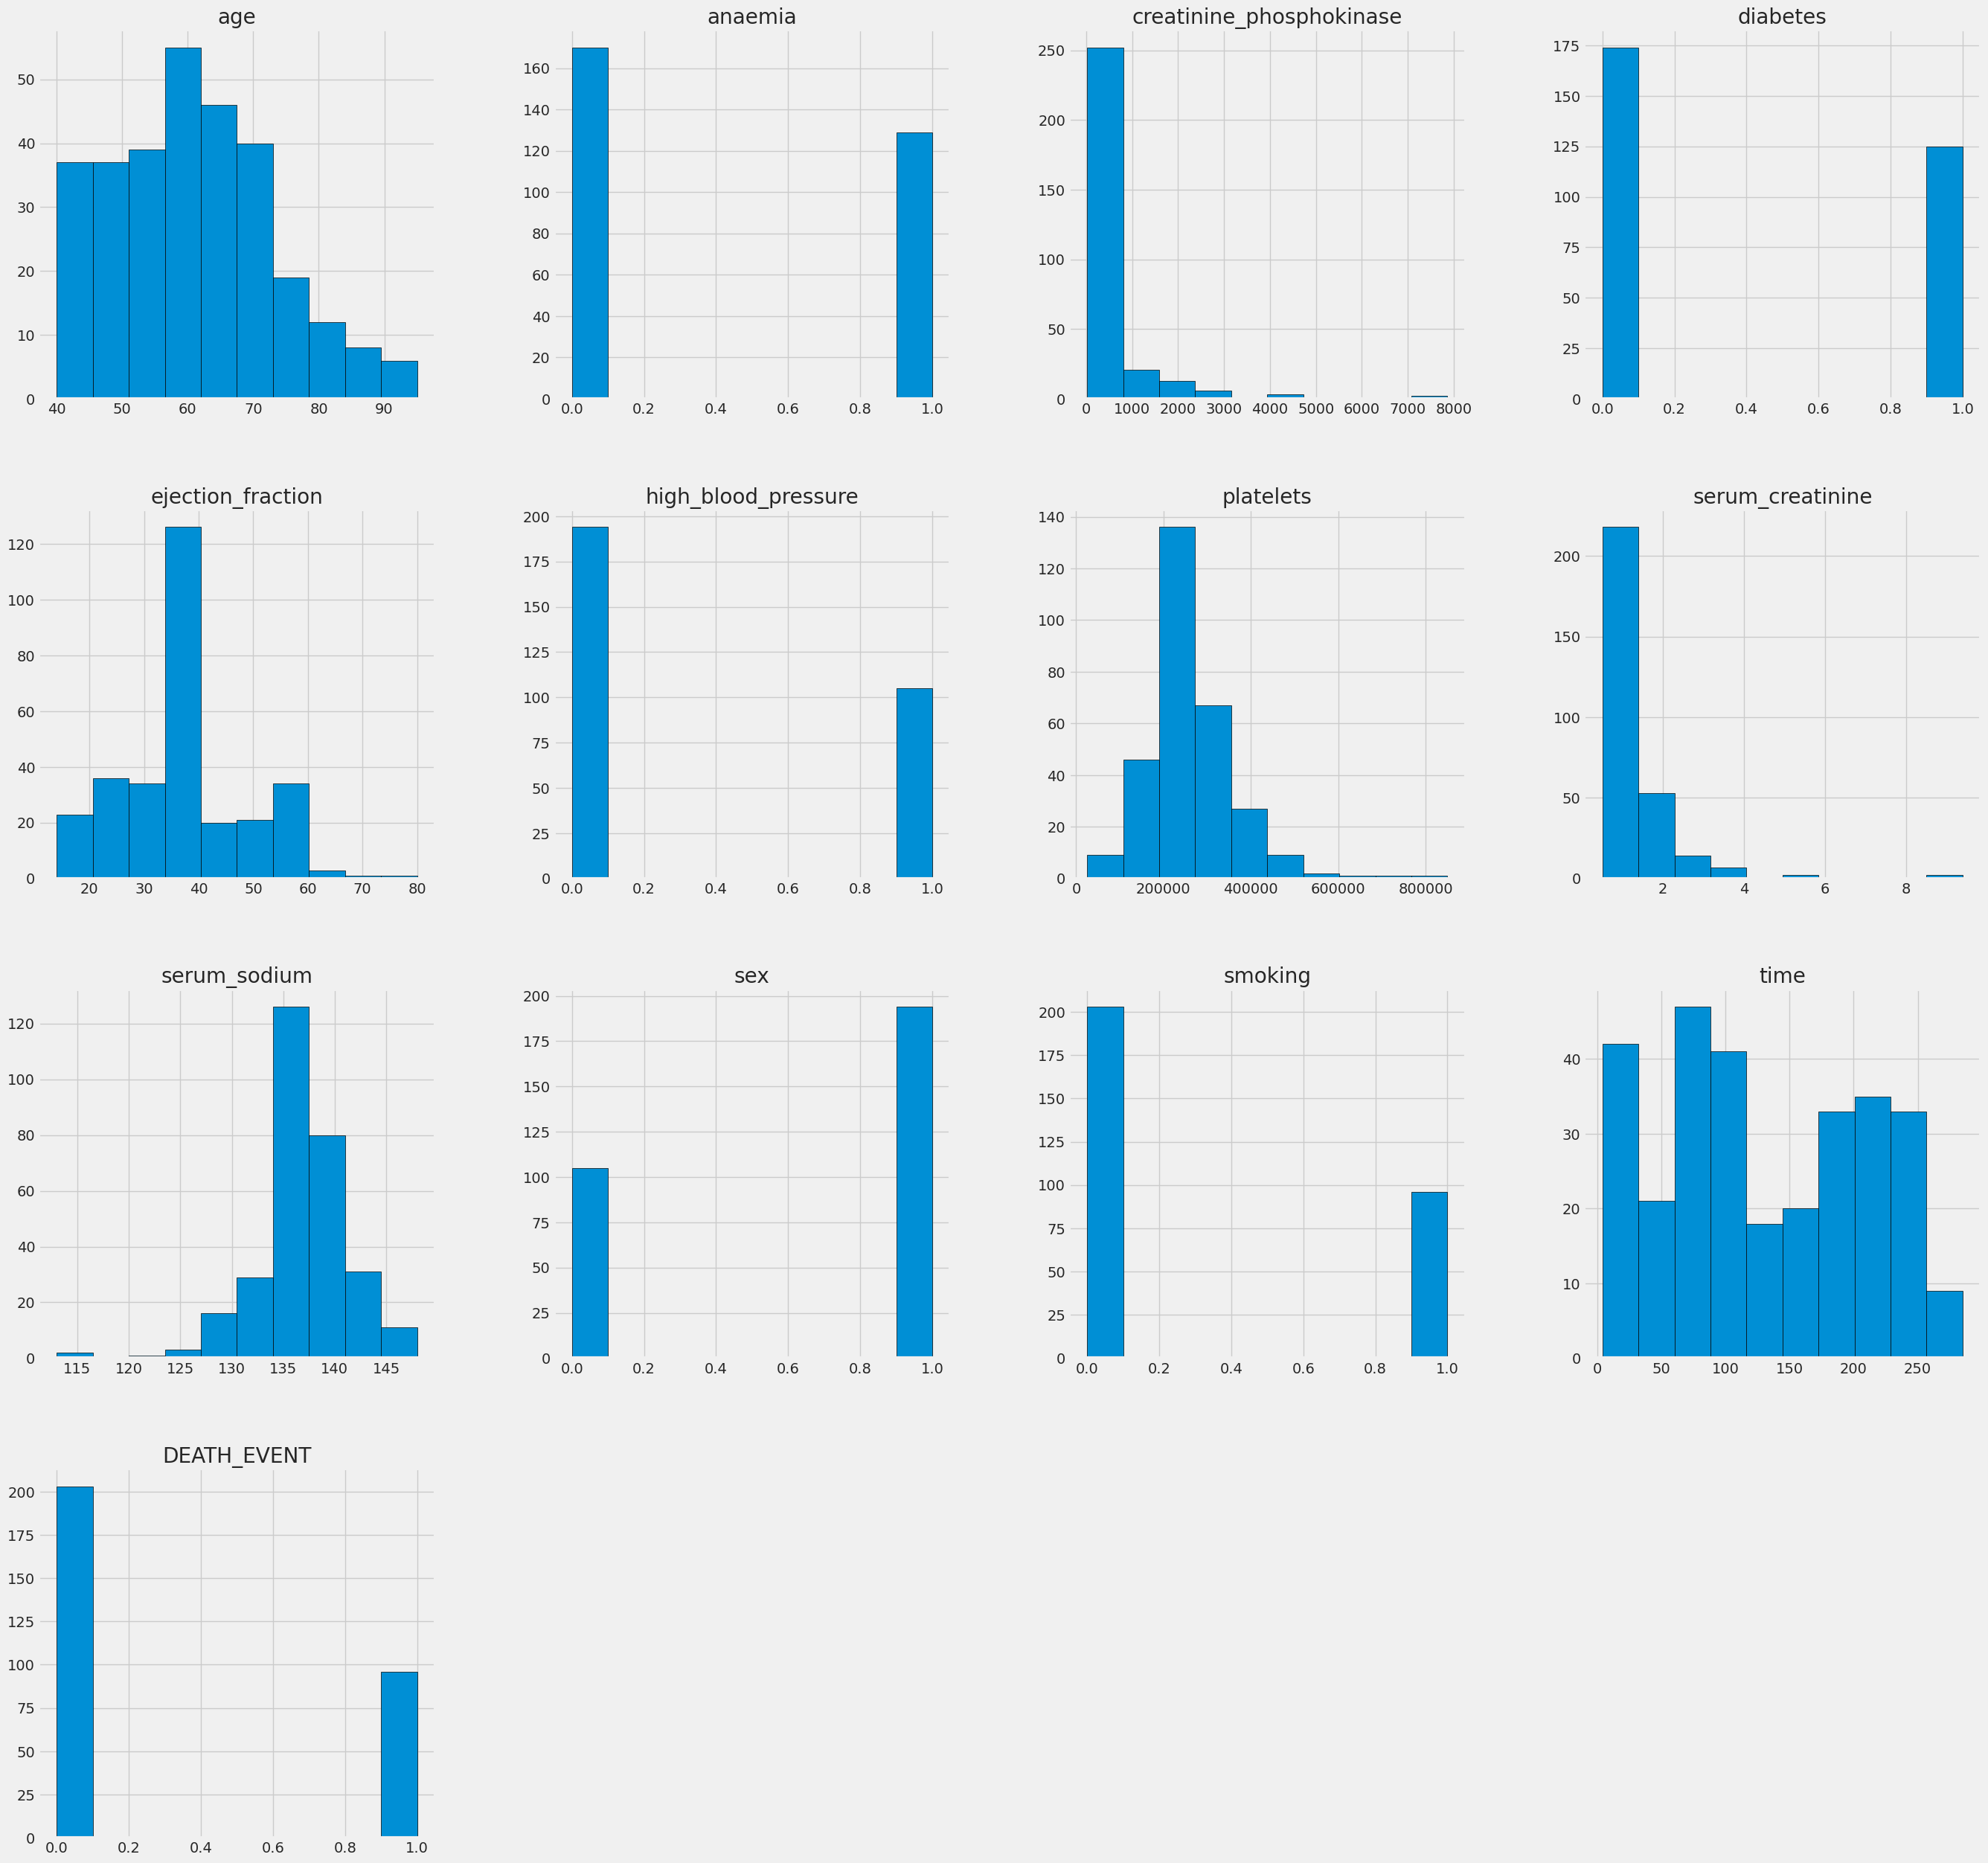

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error
dataset = pd.read_csv('/content/heart_failure_dataset.csv')
print(dataset.head())
print(dataset.shape)
continuous_features = [i for i in X.columns if X[i].nunique() > 10]
print(f'continuous feature: {continuous_features}')
dataset.isnull().sum()
plt.style.use('fivethirtyeight')
i = 1
plt.figure(figsize=(18,16))
for feature in continuous_features:
    plt.subplot(round(len(continuous_features)/2)+1, 2, i)
    sns.histplot(x=X[feature], kde=True, bins=50, hue=y)
    plt.xlabel(feature,size=12)
    plt.ylabel("Count",size=12)
    i += 1

plt.show()
import seaborn as sns
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")
dataset.hist(edgecolor='black',figsize=(30,30));
sns.set_style('whitegrid')
sns.countplot(x='DEATH_EVENT',data=dataset,palette='RdBu_r')
y = dataset['DEATH_EVENT']
X = dataset.drop(['DEATH_EVENT'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

# Standardize features for linear regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Naive Bayes Classifier
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Linear Regression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train)

# Predictions
naive_bayes_predictions = naive_bayes_model.predict(X_test)
linear_regression_predictions = linear_regression_model.predict(X_test_scaled)

# Evaluation
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
linear_regression_mae = mean_absolute_error(y_test, linear_regression_predictions)

# Print Results

print(f"Naive Bayes Accuracy: {naive_bayes_accuracy:.2f}")
print(f"Linear Regression Mean Absolute Error: {linear_regression_mae:.2f}")

# Classification Report for Naive Bayes
naive_bayes_report = classification_report(y_test, naive_bayes_predictions)
print("\nNaive Bayes Classification Report:")
print(naive_bayes_report)



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

def LRtrain(X_train, Y_train):
    lr_model = LogisticRegression()
    lr_model.fit(X_train, Y_train)
    return lr_model

def NBtrain(X_train, Y_train):
    nb_model = GaussianNB()
    nb_model.fit(X_train, Y_train)
    return nb_model

def predict(model, x_test):
    return model.predict(x_test)

if __name__ == "__main__":
    # Sample data (replace with your dataset)
    # Assume X is the feature matrix, and Y is the target variable
    X = np.array([[5, 140], [6, 120], [7, 150], [8, 130]])
    Y = np.array([0, 1, 1, 0])  # Binary labels (0 or 1)

    # Split data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Train Logistic Regression model
    lr_model = LRtrain(X_train, Y_train)

    # Train Naive Bayes model
    nb_model = NBtrain(X_train, Y_train)

    # Make predictions
    lr_predictions = predict(lr_model, X_test)
    nb_predictions = predict(nb_model, X_test)

    # Evaluate models
    lr_accuracy = accuracy_score(Y_test, lr_predictions)
    nb_accuracy = accuracy_score(Y_test, nb_predictions)

    # Print results
    print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")
    print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")
